# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.076990e+01     6.639672e+00
 * time: 0.00421905517578125
     1     2.771781e+01     5.007943e+00
 * time: 0.01235508918762207
     2     2.201070e+01     7.648542e+00
 * time: 0.031762123107910156
     3     1.285164e+01     1.826268e+00
 * time: 0.054612159729003906
     4     1.228328e+01     3.066152e+00
 * time: 0.06979107856750488
     5     1.173531e+01     1.822555e+00
 * time: 0.0849611759185791
     6     1.059411e+01     2.016790e+00
 * time: 0.10014009475708008
     7     9.853398e+00     1.254194e+00
 * time: 0.11536812782287598
     8     9.481571e+00     9.747358e-01
 * time: 0.1305680274963379
     9     9.335617e+00     4.088333e-01
 * time: 0.14571404457092285
    10     9.257955e+00     4.025441e-01
 * time: 0.16110014915466309
    11     9.211732e+00     6.068030e-01
 * time: 0.1727900505065918
    12     9.175645e+00     4.919053e-01
 * time: 0.18439412117004395
    13     9.159747e+00     3.364802e-01
 * time: 

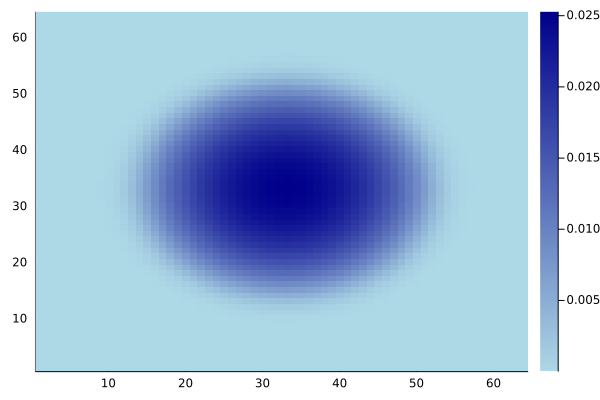

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)